In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import visualkeras



In [2]:
# Define paths to your training data folders
train_data_dir = '../data/train/'

# Image size and batch size
img_size = (96, 96)
batch_size = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)


Found 6369 images belonging to 5 classes.


Here we define the training phase of the CNN

In [13]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3), padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',  padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',  padding="same"),
    layers.MaxPooling2D((2, 2)),
  
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 12, 12, 128)      

Parameter tuning - Second Version of CNN modified

In [8]:
# Define the second variant of the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3), padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',  padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',  padding="same"),
    layers.MaxPooling2D((2, 2)),
  
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

batch_size = 64

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 128)      

Visualize the above CNN model

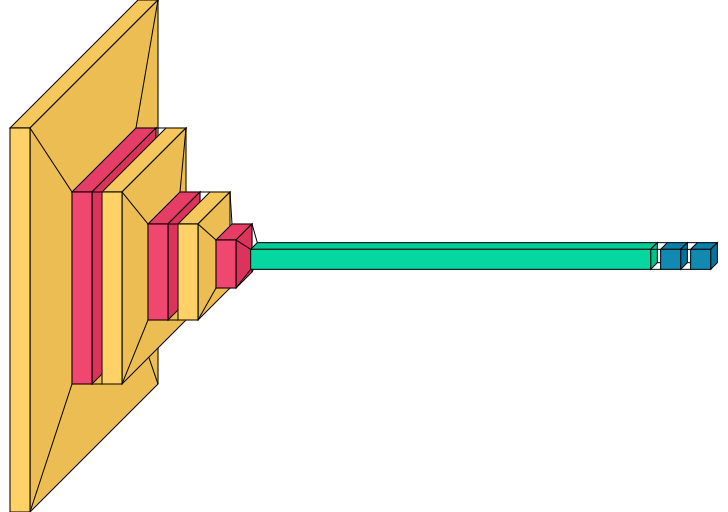

In [14]:
visualkeras.layered_view(model)  

Plot the train accuracy over the epochs

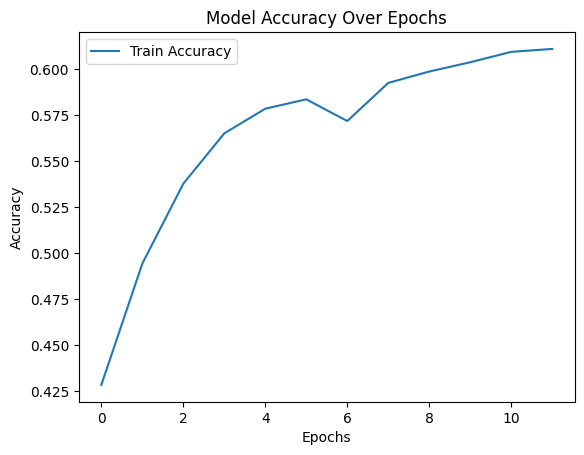

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here we define the testing phase with test dataset

In [9]:

test_data_dir = '../data/test/'

# Image size and batch size
img_size = (96, 96)
batch_size = 32

# Create data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming one-hot encoding for class labels
    color_mode='rgb',
    shuffle=False  # Keep the order of predictions for evaluation
)


# Predict on the test set
predictions = model.predict(test_generator)

# Get predicted classes
predicted_classes = tf.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Test Accuracy: {accuracy}')

# Generate a classification report
class_report = classification_report(true_classes, predicted_classes)
print('Classification Report:\n', class_report)

Found 2749 images belonging to 5 classes.
86/86 [==============================] - 2s 23ms/step
Test Accuracy: 0.6187704619861768
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37       133
           1       0.33      0.59      0.42       275
           2       0.43      0.79      0.56       406
           3       0.86      0.62      0.72      1896
           4       0.00      0.00      0.00        39

    accuracy                           0.62      2749
   macro avg       0.39      0.48      0.41      2749
weighted avg       0.71      0.62      0.64      2749



Plot the confusion matrices

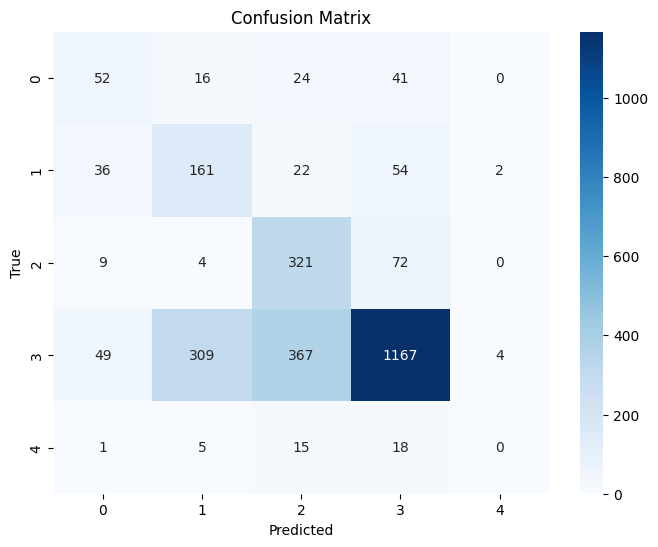

In [12]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Save the trained and tested model

In [10]:
# Save the trained model
#model.save('./first_cnn_second_variant_model.h5')

/Users/carminefa/Università/Sapienza/Progetti/ML - Homework 2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
